In [1]:
import sys
sys.path.insert(0, '/home/student.unimelb.edu.au/shorte1/Documents/TINT')

import sys
sys.path.insert(0, '/home/563/esh563/TINT')

# Core
import datetime
import os
import glob
import tempfile
import pickle
import copy

# Analysis
import numpy as np
import pandas as pd
import xarray as xr

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams

# Debugging
import pdb, traceback
# %load_ext line_profiler

# Radar Tools
import pyart
import tint
# import tint.animate
# from tint.visualisation import animate

import CPOL_func as cf
import classification as cl
import caine_func as caf
import analysis
import boring_stats as bs
import two_dimensional_analysis as td

# Convenience functions
%load_ext autoreload
%autoreload 1
%aimport CPOL_func
%aimport caine_func
%aimport classification
%aimport tint.visualisation.figures
%aimport tint.visualisation.animate
%aimport tint.visualisation.horizontal_helpers
%aimport tint.visualisation.vertical_helpers
%aimport tint.tracks
%aimport tint.objects
%aimport tint.grid_utils
%aimport tint.steiner
%aimport tint.matching
%aimport tint.rain
%aimport tint.cells
%aimport tint.tracks_helpers
%aimport tint.process_ERA5
%aimport tint.process_WRF
%aimport boring_stats
%aimport two_dimensional_analysis

%pdb

base_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/CPOL/'
save_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_tracks/'
fig_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_figures/'
ERA5_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/era5/'
ERA5_dir += 'pressure-levels/reanalysis/'
WRF_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/caine_WRF_data/'


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/student.unimelb.edu.au/shorte1/anaconda3/envs/CPOL_analysis/lib/python3.8/site-packages/networkx/readwrite/graphml.py:346: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (np.int, "int"), (np.int8, "int"),
/home/student.unimelb.edu.au/shorte1/anaconda3/envs/CPOL_analysis/lib/python3.8/site-packages/networkx/readwrite/gexf.py:220: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to us

Automatic pdb calling has been turned ON


# Generate Figures

In [2]:
all_excl_base = bs.count_CPOL_exclusions(
    save_dir+'base/', regime=None)
all_excl_two_levels = bs.count_CPOL_exclusions(
    save_dir+'two_levels/', regime=None)

weak_excl_base = bs.count_CPOL_exclusions(
    save_dir+'base/', regime=1)
weak_excl_two_levels = bs.count_CPOL_exclusions(
    save_dir+'two_levels/', regime=1)

active_excl_base = bs.count_CPOL_exclusions(
    save_dir+'base/', regime=2)
active_excl_two_levels = bs.count_CPOL_exclusions(
    save_dir+'two_levels/', regime=2)

Year 1998.
Calculating system tracks.
Year 1999.
Calculating system tracks.
Year 2001.
Calculating system tracks.
Year 2002.
Calculating system tracks.
Year 2003.
Calculating system tracks.
Year 2004.
Calculating system tracks.
Year 2005.
Calculating system tracks.
Year 2006.
Calculating system tracks.
Year 2009.
Calculating system tracks.
Year 2010.
Calculating system tracks.
Year 2011.
Calculating system tracks.
Year 2012.
Calculating system tracks.
Year 2013.
Calculating system tracks.
Year 2014.
Calculating system tracks.
Year 2015.
Calculating system tracks.
Year 1998.
Calculating system tracks.
Year 1999.
Calculating system tracks.
Year 2001.
Calculating system tracks.
Year 2002.
Calculating system tracks.
Year 2003.
Calculating system tracks.
Year 2004.
Calculating system tracks.
Year 2005.
Calculating system tracks.
Year 2006.
Calculating system tracks.
Year 2009.
Calculating system tracks.
Year 2010.
Calculating system tracks.
Year 2011.
Calculating system tracks.
Year 2012.
C

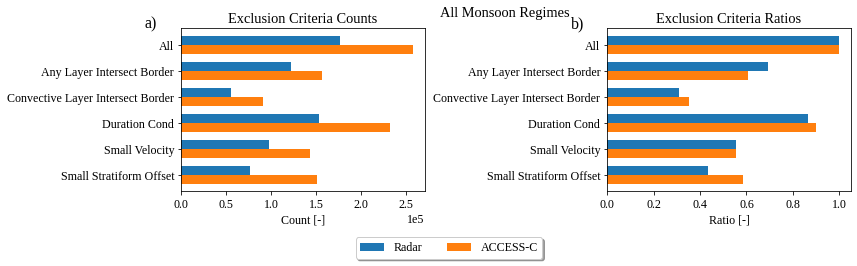

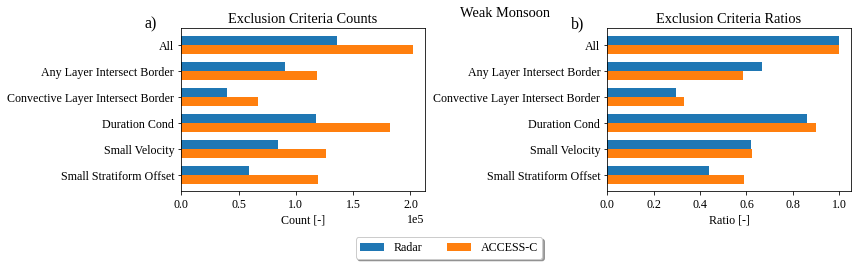

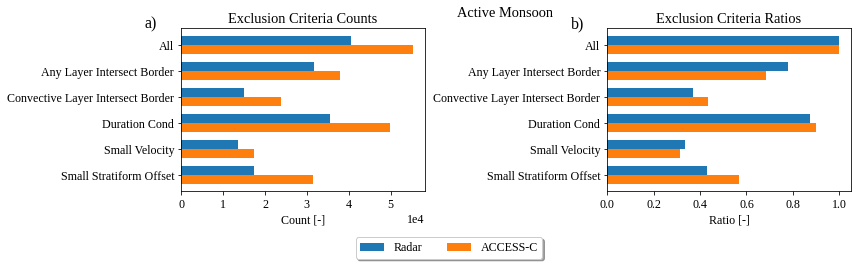

In [7]:
bs.compare_exclusions(all_excl_base, all_excl_two_levels, title='All Monsoon Regimes')
plt.savefig(
    fig_dir + 'excl_all.png', dpi=200, facecolor='w',
    edgecolor='white', bbox_inches='tight')
bs.compare_exclusions(weak_excl_base, weak_excl_two_levels, title='Weak Monsoon')
plt.savefig(
    fig_dir + 'excl_weak.png', dpi=200, facecolor='w',
    edgecolor='white', bbox_inches='tight')
bs.compare_exclusions(active_excl_base, active_excl_two_levels, title='Active Monsoon')
plt.savefig(
    fig_dir + 'excl_active.png', dpi=200, facecolor='w',
    edgecolor='white', bbox_inches='tight')

In [4]:
all_obs_base = bs.get_boring_CPOL_stats(
    save_dir+'base/', ['simple_duration_cond'], None)
QC_obs_base = bs.get_boring_CPOL_stats(
    save_dir+'base/', None, None)

all_obs_weak_base = bs.get_boring_CPOL_stats(
    save_dir+'base/', ['simple_duration_cond'], 1)
QC_obs_weak_base = bs.get_boring_CPOL_stats(
    save_dir+'base/', None, 1)

all_obs_active_base = bs.get_boring_CPOL_stats(
    save_dir+'base/', ['simple_duration_cond'], 2)
QC_obs_active_base = bs.get_boring_CPOL_stats(
    save_dir+'base/', None, 2)

Year 1998.
Calculating system tracks.
Year 1999.
Calculating system tracks.
Year 2001.
Calculating system tracks.
Year 2002.
Calculating system tracks.
Year 2003.
Calculating system tracks.
Year 2004.
Calculating system tracks.
Year 2005.
Calculating system tracks.
Year 2006.
Calculating system tracks.
Year 2009.
Calculating system tracks.
Year 2010.
Calculating system tracks.
Year 2011.
Calculating system tracks.
Year 2012.
Calculating system tracks.
Year 2013.
Calculating system tracks.
Year 2014.
Calculating system tracks.
Year 2015.
Calculating system tracks.
Year 1998.
Calculating system tracks.
Year 1999.
Calculating system tracks.
Year 2001.
Calculating system tracks.
Year 2002.
Calculating system tracks.
Year 2003.
Calculating system tracks.
Year 2004.
Calculating system tracks.
Year 2005.
Calculating system tracks.
Year 2006.
Calculating system tracks.
Year 2009.
Calculating system tracks.
Year 2010.
Calculating system tracks.
Year 2011.
Calculating system tracks.
Year 2012.
C

In [5]:
all_obs_two_levels = bs.get_boring_CPOL_stats(
    save_dir+'two_levels/', ['simple_duration_cond'], None)
QC_obs_two_levels = bs.get_boring_CPOL_stats(
    save_dir+'two_levels/', None, None)

all_obs_weak_two_levels = bs.get_boring_CPOL_stats(
    save_dir+'two_levels/', ['simple_duration_cond'], 1)
QC_obs_weak_two_levels = bs.get_boring_CPOL_stats(
    save_dir+'two_levels/', None, 1)

all_obs_active_two_levels = bs.get_boring_CPOL_stats(
    save_dir+'two_levels/', ['simple_duration_cond'], 2)
QC_obs_active_two_levels = bs.get_boring_CPOL_stats(
    save_dir+'two_levels/', None, 2)

Year 1998.
Calculating system tracks.
Year 1999.
Calculating system tracks.
Year 2001.
Calculating system tracks.
Year 2002.
Calculating system tracks.
Year 2003.
Calculating system tracks.
Year 2004.
Calculating system tracks.
Year 2005.
Calculating system tracks.
Year 2006.
Calculating system tracks.
Year 2009.
Calculating system tracks.
Year 2010.
Calculating system tracks.
Year 2011.
Calculating system tracks.
Year 2012.
Calculating system tracks.
Year 2013.
Calculating system tracks.
Year 2014.
Calculating system tracks.
Year 2015.
Calculating system tracks.
Year 1998.
Calculating system tracks.
Year 1999.
Calculating system tracks.
Year 2001.
Calculating system tracks.
Year 2002.
Calculating system tracks.
Year 2003.
Calculating system tracks.
Year 2004.
Calculating system tracks.
Year 2005.
Calculating system tracks.
Year 2006.
Calculating system tracks.
Year 2009.
Calculating system tracks.
Year 2010.
Calculating system tracks.
Year 2011.
Calculating system tracks.
Year 2012.
C

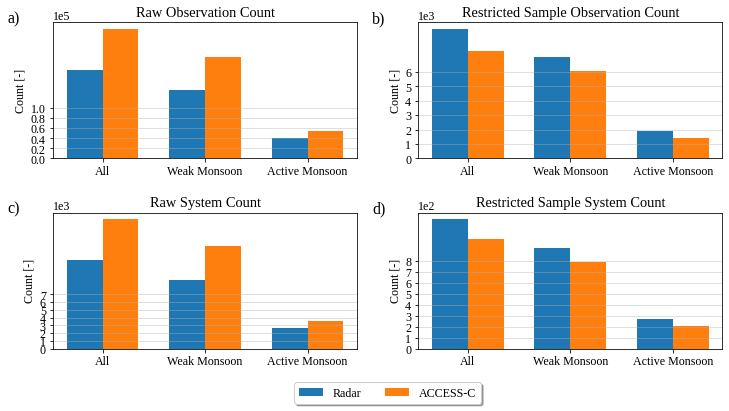

In [8]:
bs.plot_counts(
    all_obs_base, all_obs_weak_base, all_obs_active_base,
    all_obs_two_levels, all_obs_weak_two_levels, all_obs_active_two_levels,
    QC_obs_base, QC_obs_weak_base, QC_obs_active_base,
    QC_obs_two_levels, QC_obs_weak_two_levels, QC_obs_active_two_levels)
plt.savefig(
    fig_dir + 'totals_CPOL.png', dpi=200, facecolor='w',
    edgecolor='white', bbox_inches='tight')

In [14]:
QC_obs_base[3]

8977

In [15]:
QC_obs_two_levels[3]

7458

In [13]:
(257705-176523)/176523

0.4598947445941889

In [47]:
observations = 0
systems = 0

In [48]:
for radar in [42, 63, 77]:

    path = save_dir + 'ACCESS_radar_base/radar_{}/{}_{}_{:02}.pkl'.format(
        radar, radar, 2021, 1)
    with open(path, 'rb') as f:
        tracks_obj = pickle.load(f)

    exclusions = [
        'small_area', 'large_area', 'intersect_border',
        'intersect_border_convective', 'duration_cond',
        'small_velocity', 'small_offset']

    excluded = tracks_obj.exclusions[exclusions]
    excluded = np.any(excluded, 1)
    included = np.logical_not(excluded)

    cond = (included == True)

    sub_classes = tracks_obj.tracks_class.where(cond).dropna()
    observations += len(sub_classes)
    systems += len(np.unique(sub_classes.index.get_level_values(2)))

In [49]:
for radar in [42, 63, 77]:

    path = save_dir + 'ACCESS_radar_base/ACCESS_{}/20201001_20210501.pkl'.format(
        radar)
    with open(path, 'rb') as f:
        tracks_obj = pickle.load(f)

    exclusions = [
        'small_area', 'large_area', 'intersect_border',
        'intersect_border_convective', 'duration_cond',
        'small_velocity', 'small_offset']

    excluded = tracks_obj.exclusions[exclusions]
    excluded = np.any(excluded, 1)
    included = np.logical_not(excluded)

    cond = (included == True)

    sub_classes = tracks_obj.tracks_class.where(cond).dropna()
    dateindex = sub_classes.index.get_level_values('time')
    sub_classes = sub_classes.loc[dateindex.month == 1]
    
#     import pdb; pdb.set_trace()
    
    observations += len(sub_classes)
    systems += len(np.unique(sub_classes.index.get_level_values(2)))

In [51]:
systems

133

In [42]:
dateindex = sub_classes.index.get_level_values('time')
sub_classes_1 = sub_classes.loc[dateindex.month == 1]
sub_classes_1

grid_x        grid_y        lon  \
scan  time                uid  level                                          
13466 2021-01-02 12:20:00 906  0      72700.366974  22421.855927  133.12075   
                               1      84997.005463  16153.182983  133.23507   
13467 2021-01-02 12:30:00 906  0      76155.109406  16844.406128  133.15297   
                               1      86407.146454  11690.731049  133.24831   
13468 2021-01-02 12:40:00 906  0      73292.407990  27969.226837  133.12609   
...                                            ...           ...        ...   
17618 2021-01-31 08:20:00 1285 1      43826.980591 -22569.551468  132.85351   
17619 2021-01-31 08:30:00 1285 0      48471.450806 -38777.523041  132.89700   
                               1      32059.669495 -26774.635315  132.74415   
17620 2021-01-31 08:40:00 1285 0      45810.241699 -40175.876617  132.87226   
                               1      28792.896271 -28802.356720  132.71379   

                                           lat          inflow_type  \
scan  time                uid  level                                  
13466 2021-01-02 12:20:00 906  0     -14.31039            Front Fed   
                               1     -14.36642            Front Fed   
13467 2021-01-02 12:30:00 906  0     -14.36046            Front Fed   
                               1     -14.40650            Front Fed   
13468 2021-01-02 12:40:00 906  0     -14.26049            Front Fed   
...                                        ...                  ...   
17618 2021-01-31 08:20:00 1285 1     -14.71562  Parallel Fed (Left)   
17619 2021-01-31 08:30:00 1285 0     -14.86130            Front Fed   
                               1     -14.75360  Parallel Fed (Left)   
17620 2021-01-31 08:40:00 1285 0     -14.87392            Front Fed   
                               1     -14.77187  Parallel Fed (Left)   

                                                     propagation_type  \
scan  time                uid  level                                    
13466 2021-01-02 12:20:00 906  0               Down-Shear Propagating   
                               1               Down-Shear Propagating   
13467 2021-01-02 12:30:00 906  0               Down-Shear Propagating   
                               1      Ambiguous (Perpendicular Shear)   
13468 2021-01-02 12:40:00 906  0               Down-Shear Propagating   
...                                                               ...   
17618 2021-01-31 08:20:00 1285 1                 Up-Shear Propagating   
17619 2021-01-31 08:30:00 1285 0      Ambiguous (Perpendicular Shear)   
                               1                 Up-Shear Propagating   
17620 2021-01-31 08:40:00 1285 0               Down-Shear Propagating   
                               1                 Up-Shear Propagating   

                                              tilt_type  \
scan  time                uid  level                      
13466 2021-01-02 12:20:00 906  0        Up-Shear Tilted   
                               1        Up-Shear Tilted   
13467 2021-01-02 12:30:00 906  0        Up-Shear Tilted   
                               1        Up-Shear Tilted   
13468 2021-01-02 12:40:00 906  0        Up-Shear Tilted   
...                                                 ...   
17618 2021-01-31 08:20:00 1285 1      Down-Shear Tilted   
17619 2021-01-31 08:30:00 1285 0      Down-Shear Tilted   
                               1      Down-Shear Tilted   
17620 2021-01-31 08:40:00 1285 0      Down-Shear Tilted   
                               1      Down-Shear Tilted   

                                                           offset_type  \
scan  time                uid  level                                     
13466 2021-01-02 12:20:00 906  0      Ambiguous (On Quadrant Boundary)   
                               1      Ambiguous (On Quadrant Boundary)   
13467 2021-01-02 12:30:00 906  0      Ambiguous (On Quadrant Boundary)   
    

In [26]:
len(sub_classes)

86

In [25]:
len(np.unique(sub_classes.index.get_level_values(0)))

43

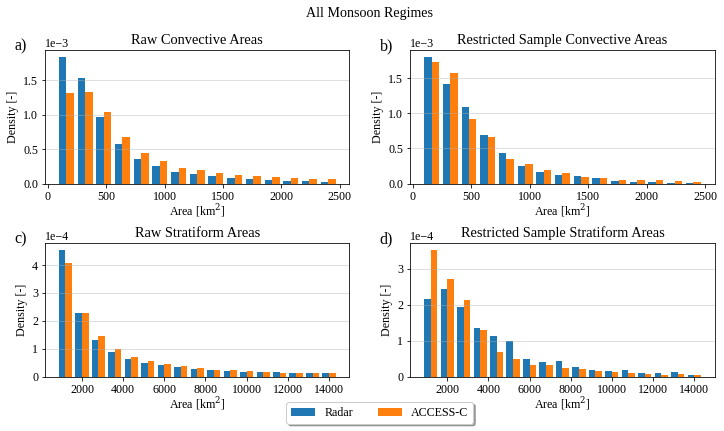

In [196]:
density = True

bs.compare_sizes(
    all_obs_radar, all_obs_ACCESS, 
    QC_obs_radar, QC_obs_ACCESS, density=density, 
    title='All Monsoon Regimes')
plt.savefig(
    fig_dir + 'sizes_ACCESS_radar_all_{}.png'.format(suff), dpi=200, facecolor='w',
    edgecolor='white', bbox_inches='tight')

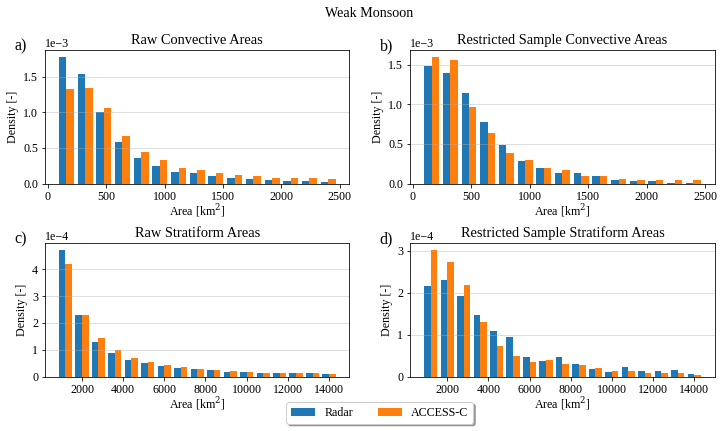

In [197]:
bs.compare_sizes(
    all_obs_weak_radar, all_obs_weak_ACCESS, 
    QC_obs_weak_radar, QC_obs_weak_ACCESS, density=density,
    title='Weak Monsoon')
plt.savefig(
    fig_dir + 'sizes_ACCESS_radar_weak_{}.png'.format(suff), dpi=200, facecolor='w',
    edgecolor='white', bbox_inches='tight')

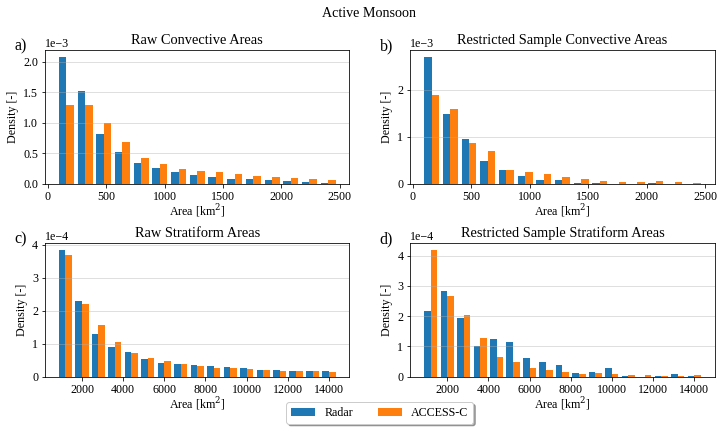

In [198]:
bs.compare_sizes(
    all_obs_active_radar, all_obs_active_ACCESS, 
    QC_obs_active_radar, QC_obs_active_ACCESS, density=density,
    title='Active Monsoon')
plt.savefig(
    fig_dir + 'sizes_ACCESS_radar_active_{}.png'.format(suff), dpi=200, facecolor='w',
    edgecolor='white', bbox_inches='tight')

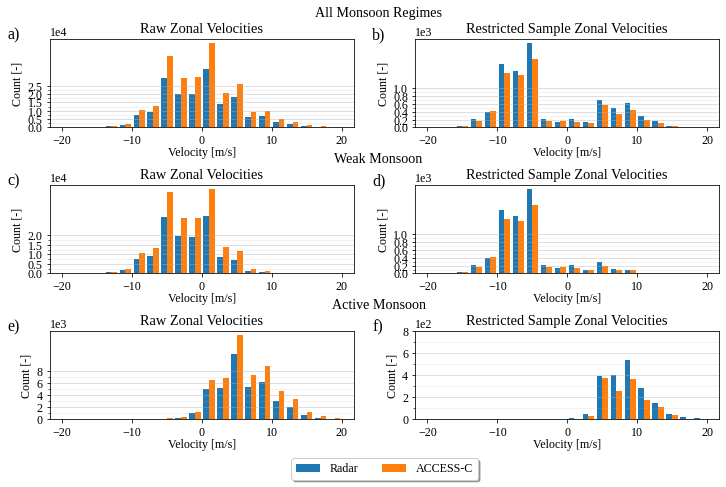

In [21]:
density=False

fig, axes = plt.subplots(3, 2, figsize=(12, 7))

bs.compare_velocities(
    all_obs_base, all_obs_two_levels,
    QC_obs_base, QC_obs_two_levels, density=density, 
    title='All Monsoon Regimes', labels=False,
    legend=False, fig=fig, ax=axes[0,:])

bs.compare_velocities(
    all_obs_weak_base, all_obs_weak_two_levels,
    QC_obs_weak_base, QC_obs_weak_two_levels, density=density, labels=False,
    title='Weak Monsoon', legend=False, fig=fig, ax=axes[1,:])

bs.compare_velocities(
    all_obs_active_base, all_obs_active_two_levels,
    QC_obs_active_base, QC_obs_active_two_levels, density=density, 
    labels=False, title='Active Monsoon', fig=fig, ax=axes[2,:])

plt.subplots_adjust(hspace=.65)

cl.make_subplot_labels(axes.flatten(), x_shift=-.14)

axes.flatten()[-2].legend(
    loc='lower center', bbox_to_anchor=(1.1, -0.75),
    ncol=2, fancybox=True, shadow=True)

maximums = [2.5e4, 10e2, 2e4, 10e2, 8e3, 8e2]
dy = [.5e4, 2e2, .5e4, 2e2, 2e3, 2e2]

for i in range(len(axes.flatten())):
    axes.flatten()[i].set_yticks(np.arange(0, maximums[i]+dy[i], dy[i]))
    axes.flatten()[i].set_yticks(
        np.arange(0, maximums[i]+dy[i]/2, dy[i]/2), minor=True)
    axes.flatten()[i].grid(which='minor', alpha=0.2, axis='y')
    axes.flatten()[i].grid(which='major', alpha=0.5, axis='y')
    
plt.savefig(
    fig_dir + '/zonal_ACCESS_radar_active_compare.png', 
    dpi=200, facecolor='w', edgecolor='white', bbox_inches='tight')

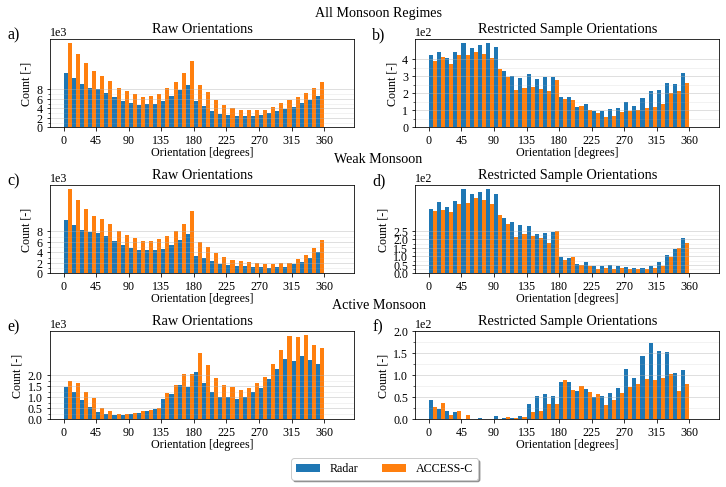

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(12, 7))

bs.compare_orientation(
    all_obs_base, all_obs_two_levels,
    QC_obs_base, QC_obs_two_levels, density=density, 
    title='All Monsoon Regimes', fig=fig, ax=axes[0,:])

bs.compare_orientation(
    all_obs_weak_base, all_obs_weak_two_levels,
    QC_obs_weak_base, QC_obs_weak_two_levels, density=density, 
    title='Weak Monsoon', fig=fig, ax=axes[1,:])

bs.compare_orientation(
    all_obs_active_base, all_obs_active_two_levels,
    QC_obs_active_base, QC_obs_active_two_levels, density=density, 
    title='Active Monsoon', fig=fig, ax=axes[2,:])

axes.flatten()[-2].legend(
    loc='lower center', bbox_to_anchor=(1.1, -0.75),
    ncol=2, fancybox=True, shadow=True)

plt.subplots_adjust(hspace=.65)

cl.make_subplot_labels(axes.flatten(), x_shift=-.14)

maximums = [8e3, 4e2, 8e3, 2.5e2, 2e3, 2e2]
dy = [2e3, 1e2, 2e3, .5e2, .5e3, .5e2]

for i in range(len(axes.flatten())):
    axes.flatten()[i].set_yticks(np.arange(0, maximums[i]+dy[i], dy[i]))
    axes.flatten()[i].set_yticks(
        np.arange(0, maximums[i]+dy[i]/2, dy[i]/2), minor=True)
    axes.flatten()[i].grid(which='minor', alpha=0.2, axis='y')
    axes.flatten()[i].grid(which='major', alpha=0.5, axis='y')

plt.savefig(
    fig_dir + '/orientation_ACCESS_radar_active_compare.png', 
    dpi=200, facecolor='w', edgecolor='white', bbox_inches='tight')

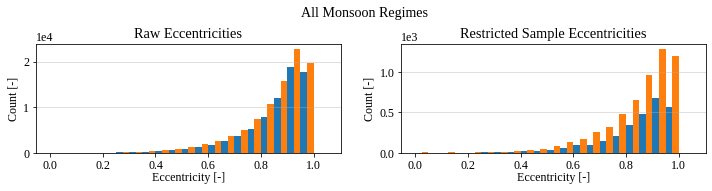

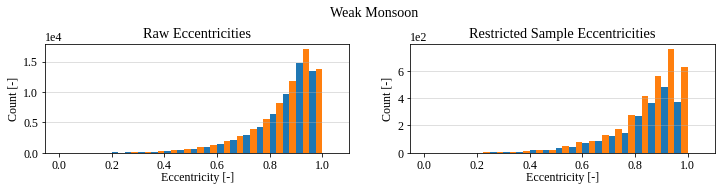

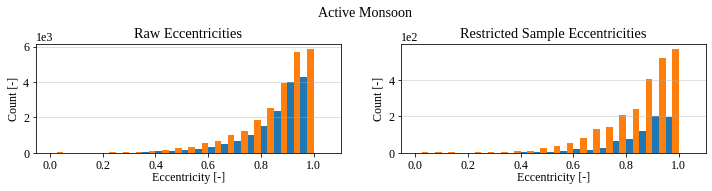

In [168]:
bs.compare_eccentricity(
    all_obs_radar, all_obs_ACCESS,
    QC_obs_radar, QC_obs_ACCESS, density=density, 
    title='All Monsoon Regimes')

plt.savefig(
    fig_dir + 'shape_ACCESS_radar_all_{}.png'.format(suff), 
    dpi=200, facecolor='w',
    edgecolor='white', bbox_inches='tight')

bs.compare_eccentricity(
    all_obs_weak_radar, all_obs_weak_ACCESS,
    QC_obs_weak_radar, QC_obs_weak_ACCESS, density=density, 
    title='Weak Monsoon')

plt.savefig(
    fig_dir + 'shape_ACCESS_radar_weak_{}.png'.format(suff), 
    dpi=200, facecolor='w',
    edgecolor='white', bbox_inches='tight')

bs.compare_eccentricity(
    all_obs_active_radar, all_obs_active_ACCESS,
    QC_obs_active_radar, QC_obs_active_ACCESS, density=density, 
    title='Active Monsoon')

plt.savefig(
    fig_dir + 'shape_ACCESS_radar_active_{}.png'.format(suff), 
    dpi=200, facecolor='w', edgecolor='white', bbox_inches='tight')

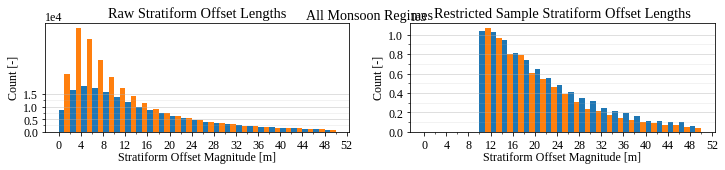

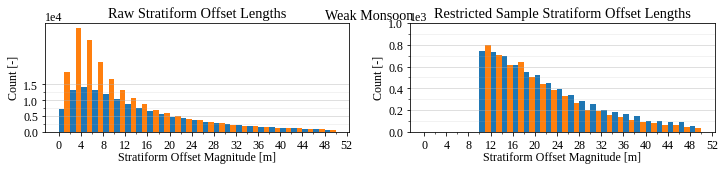

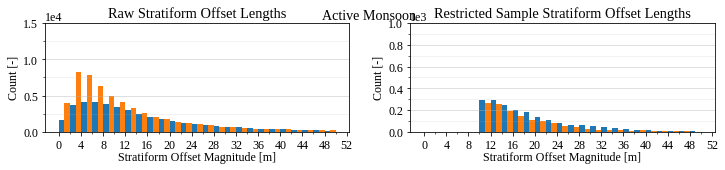

In [19]:
availabledensity = True

bs.compare_offset(
    all_obs_base, all_obs_two_levels,
    QC_obs_base, QC_obs_two_levels, density=density, 
    title='All Monsoon Regimes')

plt.savefig(
    fig_dir + 'offset_CPOL_all.png', dpi=200, 
    facecolor='w', edgecolor='white', bbox_inches='tight')

bs.compare_offset(
    all_obs_weak_base, all_obs_weak_two_levels,
    QC_obs_weak_base, QC_obs_weak_two_levels, density=density, 
    title='Weak Monsoon')

plt.savefig(
    fig_dir + 'offset_CPOL_weak.png', 
    dpi=200, facecolor='w', edgecolor='white', bbox_inches='tight')

bs.compare_offset(
    all_obs_active_base, all_obs_active_two_levels,
    QC_obs_active_base, QC_obs_active_two_levels, density=density, 
    title='Active Monsoon')

plt.savefig(
    fig_dir + 'offset_CPOL_active.png', dpi=200, 
    facecolor='w', edgecolor='white', bbox_inches='tight')

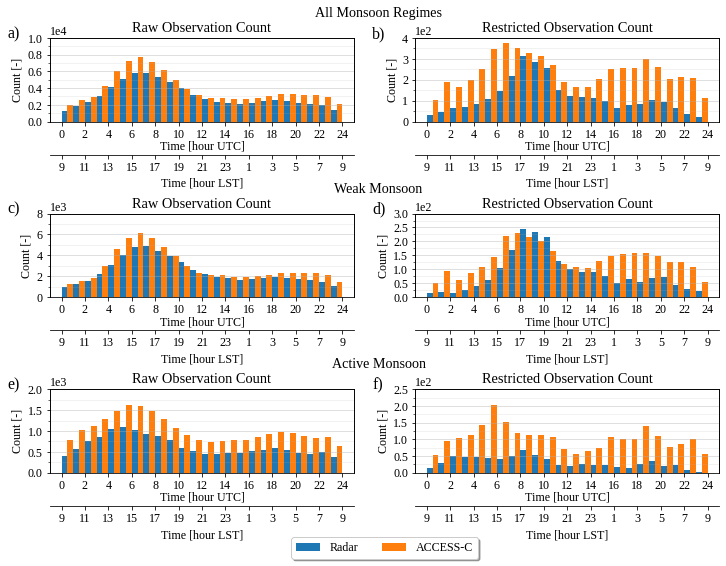

In [89]:
density=False

fig, axes = plt.subplots(3, 2, figsize=(12, 8))

bs.compare_time(
    all_obs_radar, all_obs_ACCESS,
    QC_obs_radar, QC_obs_ACCESS, density=density, 
    title='All Monsoon Regimes', fig=fig, ax=axes[0,:])

# plt.savefig(
#     fig_dir + 'time_ACCESS_radar_all_{}.png'.format(suff), dpi=200, 
#     facecolor='w', edgecolor='white', bbox_inches='tight')

bs.compare_time(
    all_obs_weak_radar, all_obs_weak_ACCESS,
    QC_obs_weak_radar, QC_obs_weak_ACCESS, density=density, 
    title='Weak Monsoon', fig=fig, ax=axes[1,:])

# plt.savefig(
#     fig_dir + 'time_ACCESS_radar_weak_{}.png'.format(suff), 
#     dpi=200, facecolor='w', edgecolor='white', bbox_inches='tight')

bs.compare_time(
    all_obs_active_radar, all_obs_active_ACCESS,
    QC_obs_active_radar, QC_obs_active_ACCESS, density=density, 
    title='Active Monsoon', fig=fig, ax=axes[2,:])

axes.flatten()[-2].legend(
    loc='lower center', bbox_to_anchor=(1.1, -1.10),
    ncol=2, fancybox=True, shadow=True)

plt.subplots_adjust(hspace=1.1)

cl.make_subplot_labels(axes.flatten(), x_shift=-.14)

maximums = [10e3, 4e2, 8e3, 3e2, 2e3, 2.5e2]
dy = [2e3, 1e2, 2e3, .5e2, .5e3, .5e2]

for i in range(len(axes.flatten())):
    axes.flatten()[i].set_yticks(np.arange(0, maximums[i]+dy[i], dy[i]))
    axes.flatten()[i].set_yticks(
        np.arange(0, maximums[i]+dy[i]/2, dy[i]/2), minor=True)
    axes.flatten()[i].grid(which='minor', alpha=0.2, axis='y')
    axes.flatten()[i].grid(which='major', alpha=0.5, axis='y')

plt.savefig(
    fig_dir + '/time_ACCESS_radar_active_compare.png', dpi=200, 
    facecolor='w', edgecolor='white', bbox_inches='tight')

In [60]:
(np.arange(0,25,1)+9) % 24

array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9])

(array([[0.        , 0.        , 0.        , 0.01401617, 0.01105121,
         0.00916442, 0.00889488, 0.0083558 , 0.00619946, 0.00431267,
         0.00512129, 0.00404313, 0.00269542, 0.00458221, 0.00431267,
         0.00161725, 0.00188679, 0.00080863, 0.00188679, 0.00107817,
         0.00404313, 0.00026954, 0.00053908, 0.00134771, 0.00134771,
         0.00053908, 0.00107817, 0.        , 0.00080863],
        [0.        , 0.        , 0.        , 0.01685083, 0.01325967,
         0.01187845, 0.00966851, 0.00662983, 0.00441989, 0.00593923,
         0.0058011 , 0.00400552, 0.00262431, 0.00276243, 0.00248619,
         0.00179558, 0.00082873, 0.00207182, 0.00220994, 0.00096685,
         0.00138122, 0.00124309, 0.00013812, 0.00069061, 0.00069061,
         0.00055249, 0.00027624, 0.00013812, 0.00069061]]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290]),
 <a list of 2 Ba

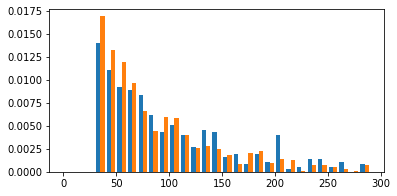

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(6,3))

ax.hist([QC_obs_radar[-1], QC_obs_ACCESS[-1]], bins=np.arange(0,300,10), density=True)

(array([ 0.,  0.,  0., 58., 49., 40., 32., 16., 17., 23., 19., 15., 10.,
         6.,  7.,  5.,  4.,  6.,  3.,  2.,  5.,  4.,  0.,  3.,  1.,  1.,
         1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  2.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
        390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
        520, 530, 540, 550, 560, 570, 580, 590]),
 <BarContainer object of 59 artists>)

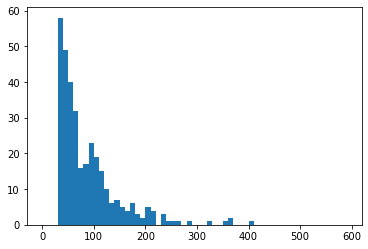

In [81]:
all_obs_ACCESS_42 = bs.get_boring_ACCESS_stats(
    save_dir, ['simple_duration_cond'], None, radars=[42])
QC_obs_ACCESS_42 = bs.get_boring_ACCESS_stats(
    save_dir, None, None, radars=[42])

all_obs_ACCESS_63 = bs.get_boring_ACCESS_stats(
    save_dir, ['simple_duration_cond'], None, radars=[63])
QC_obs_ACCESS_63 = bs.get_boring_ACCESS_stats(
    save_dir, None, None, radars=[63])

all_obs_ACCESS_77 = bs.get_boring_ACCESS_stats(
    save_dir, ['simple_duration_cond'], None, radars=[77])
QC_obs_ACCESS_77 = bs.get_boring_ACCESS_stats(
    save_dir, None, None, radars=[77])

all_obs_radar_42 = bs.get_boring_radar_stats(
    save_dir, ['simple_duration_cond'], None, radars=[42])
QC_obs_radar_42 = bs.get_boring_radar_stats(
    save_dir, None, None, radars=[42])

all_obs_radar_63 = bs.get_boring_radar_stats(
    save_dir, ['simple_duration_cond'], None, radars=[63])
QC_obs_radar_63 = bs.get_boring_radar_stats(
    save_dir, None, None, radars=[63])

all_obs_radar_77 = bs.get_boring_radar_stats(
    save_dir, ['simple_duration_cond'], None, radars=[77])
QC_obs_radar_77 = bs.get_boring_radar_stats(
    save_dir, None, None, radars=[77])

Radar 42, year 2020.
Calculating system tracks.
Radar 42, year 2021.
Calculating system tracks.
Radar 42, year 2020.
Calculating system tracks.
Radar 42, year 2021.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Radar 77, year 2021.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Radar 77, year 2021.
Calculating system tracks.
Radar 42, year 2020.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 42, year 2021.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Rada

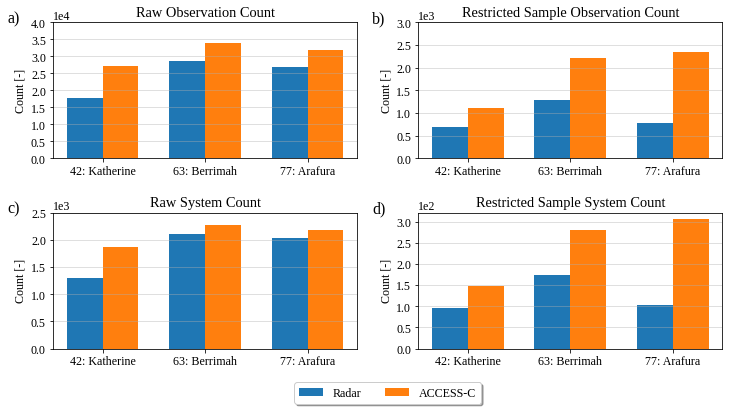

In [6]:
bs.plot_counts_regional(
    all_obs_radar_42, all_obs_radar_63, all_obs_radar_77,
    all_obs_ACCESS_42, all_obs_ACCESS_63, all_obs_ACCESS_77,
    QC_obs_radar_42, QC_obs_radar_63, QC_obs_radar_77,
    QC_obs_ACCESS_42, QC_obs_ACCESS_63, QC_obs_ACCESS_77)

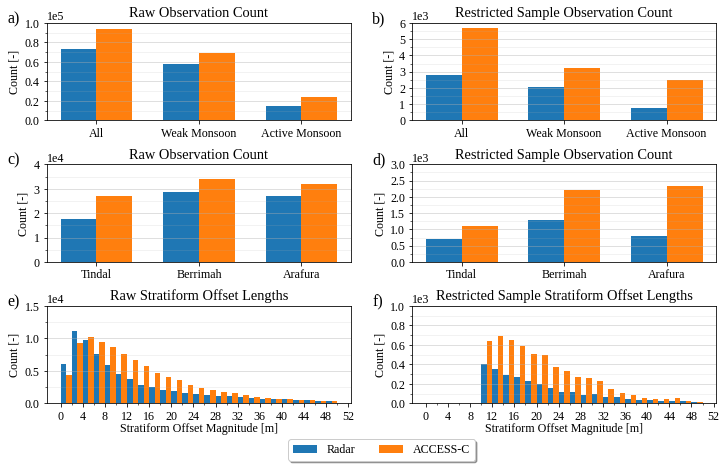

In [82]:
density = False

fig, axes = plt.subplots(3, 2, figsize=(12, 7))

bs.plot_counts_regional_seasonal(
    all_obs_radar, all_obs_weak_radar, all_obs_active_radar,
    all_obs_ACCESS, all_obs_weak_ACCESS, all_obs_active_ACCESS,
    QC_obs_radar, QC_obs_weak_radar, QC_obs_active_radar,
    QC_obs_ACCESS, QC_obs_weak_ACCESS, QC_obs_active_ACCESS,
    all_obs_radar_42, all_obs_radar_63, all_obs_radar_77,
    all_obs_ACCESS_42, all_obs_ACCESS_63, all_obs_ACCESS_77,
    QC_obs_radar_42, QC_obs_radar_63, QC_obs_radar_77,
    QC_obs_ACCESS_42, QC_obs_ACCESS_63, QC_obs_ACCESS_77,
    fig=fig, ax=axes[:2, :], legend=False, sp_labels=False)

bs.compare_offset(
    all_obs_radar, all_obs_ACCESS,
    QC_obs_radar, QC_obs_ACCESS, density=density, 
    fig=fig, ax=axes[2,:])

cl.make_subplot_labels(axes.flatten(), x_shift=-.13)

axes.flatten()[-2].legend(
    loc='lower center', bbox_to_anchor=(1.1, -0.65),
    ncol=2, fancybox=True, shadow=True)

plt.savefig(
    fig_dir + '/regional_seasonal_counts_offset.png'.format(suff), dpi=200, 
    facecolor='w', edgecolor='white', bbox_inches='tight')

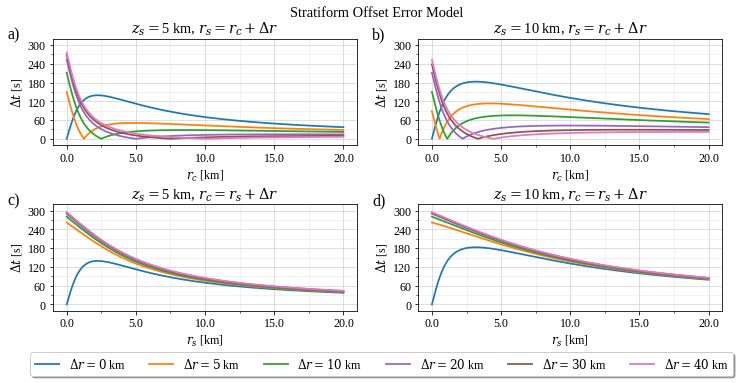

In [662]:
fig, ax = plt.subplots(2, 2, figsize=(12, 5))

bs.gen_error_model_plot(z_s=5000, fig=fig, ax=ax.flatten()[0])
bs.gen_error_model_plot(z_s=10000, fig=fig, ax=ax.flatten()[1])
bs.gen_error_model_plot(z_s=5000, fig=fig, ax=ax.flatten()[2], closest='stratiform')
bs.gen_error_model_plot(z_s=10000, fig=fig, ax=ax.flatten()[3], closest='stratiform')

# lines, labels = ax[0].get_legend_handles_labels()
# lines = [lines[i] for i in [0, 3, 1, 4, 2]]
# labels = [labels[i] for i in [0, 3, 1, 4, 2]]

ax.flatten()[2].legend(
    loc='lower center',
    bbox_to_anchor=(1.08, -.67),
    ncol=6, fancybox=True, shadow=True)

plt.subplots_adjust(hspace=.56)

plt.suptitle('Stratiform Offset Error Model', y=.97)

cl.make_subplot_labels(ax.flatten(), x_shift=-.15)

plt.savefig(
    fig_dir + '/error_model.png',
    dpi=200, facecolor='w', edgecolor='white', bbox_inches='tight')

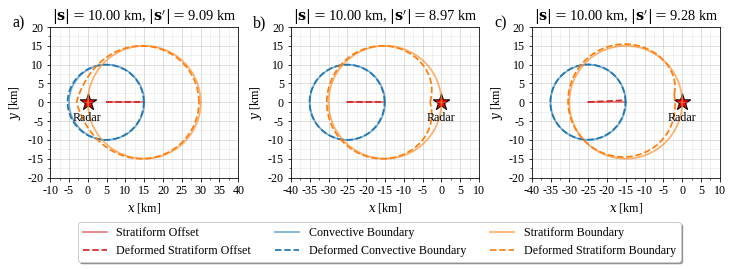

In [946]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# row 1
bs.plot_deformation(
    fig=fig, ax=ax[0], u=-10, v=0, strat_centroid_x=15e3, 
    conv_centroid_x=5e3, 
    conv_radius=10e3, strat_radius=15e3, tau=300, 
    extent=[-10e3, 40e3, -20e3, 20e3], dx=5e3)

bs.plot_deformation(
    fig=fig, ax=ax[1], u=-10, v=0, strat_centroid_x=-15e3, 
    conv_centroid_x=-25e3, conv_radius=10e3, strat_radius=15e3, 
    tau=300, extent=[-40e3, 10e3, -20e3, 20e3], dx=5e3)

bs.plot_deformation(
    fig=fig, ax=ax[2], u=-np.sqrt(1/2)*10, v=np.sqrt(1/2)*10, 
    strat_centroid_x=-15e3, conv_centroid_x=-25e3, conv_radius=10e3, 
    strat_radius=15e3, tau=300, extent=[-40e3, 10e3, -20e3, 20e3], 
    dx=5e3)

for i in range(len(ax.flatten())):
    ax.flatten()[i].set_aspect('equal')

ax[0].legend(
    loc='lower center',
    bbox_to_anchor=(1.75, -.6),
    ncol=3, fancybox=True, shadow=True)

cl.make_subplot_labels(ax.flatten(), x_shift=-.2)
plt.subplots_adjust(wspace=.28)

plt.savefig(
    fig_dir + '/deformation.png',
    dpi=200, facecolor='w', edgecolor='white', 
    bbox_inches='tight')

In [947]:
x_range = np.arange(-60e3, 61e3, 1e3)
conv_radius = 10e3
strat_radius = 15e3

so_list = [10e3, 10e3, 10e3, 40e3, 10e3, 10e3]
u_list = [-10, -10, -np.sqrt(1/2)*10, -10, -10, -10]
v_list = [0, 0, np.sqrt(1/2)*10, 0, 0, 0]
conv_centroid_y = [0, 20e3, 0, 0, 0, 0]
strat_centroid_y = [0, 20e3, 0, 0, 0, 0]
conv_radius = [10e3, 10e3, 10e3, 10e3, 20e3, 10e3]
strat_radius = [15e3, 15e3, 15e3, 15e3, 15e3, 30e3]

labels = [
    r'Baseline', r'$y$ Displacement', r'Non-Parallel',
    r'$|\mathrm{\mathbf{s}}|=$ 40 km', r'Larger Convective Area', 
    r'Larger Stratiform Area']

In [948]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors = [colors[i] for i in [0, 1, 2, 4, 5, 6]]

In [949]:
offsets = [np.zeros(len(x_range)) for i in range(len(so_list))]

for k in range(len(so_list)):
    for i in range(len(x_range)):
        offset = bs.plot_deformation(
            u=u_list[k], v=v_list[k], 
            strat_centroid_x=x_range[i], 
            conv_centroid_x=(x_range[i]+so_list[k]),
            conv_radius=conv_radius[k], strat_radius=strat_radius[k],
            conv_centroid_y=conv_centroid_y[k],
            strat_centroid_y=strat_centroid_y[k],
            tau=300, plot=False)
        offsets[k][i] = offset
        plt.close('all')

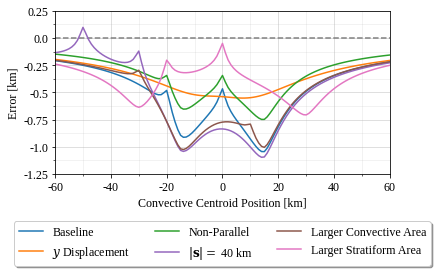

In [951]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

# for so in list(set(so_list))[:-1]:
#     ax.plot(
#         x_range, so*np.ones_like(x_range),  '--', color='grey')
ax.plot(
    x_range, np.zeros_like(x_range),  '--', color='grey')

extent = [-60e3, 60e3, -1.25e3, .25e3]
dx = 20e3
dy = .25e3

for k in range(len(so_list)):

    ax.plot(
        x_range, so_list[k]-offsets[k], color=colors[k], label=labels[k])

ax.set_xlim([extent[0], extent[1]])
ax.set_ylim([extent[2], extent[3]])
ax.set_xticks(np.arange(extent[0], extent[1]+dx, dx))
ax.set_xticks(
    np.arange(extent[0], extent[1]+dx/2, dx/2), minor=True)
ax.set_xticklabels(
    (np.arange(extent[0], extent[1]+dx, dx)/1e3).astype(int))
ax.set_yticks(np.arange(extent[2], extent[3]+dy, dy))
ax.set_yticks(
    np.arange(extent[2], extent[3]+dy/2, dy/2), minor=True)
ax.set_yticklabels(
    (np.arange(extent[2], extent[3]+dy, dy)/1e3).round(2))

ax.grid(which='minor', alpha=0.2, axis='both')
ax.grid(which='major', alpha=0.5, axis='both')
ax.set_xlabel(r'Convective Centroid Position [km]')
ax.set_ylabel(r"Error [km]")
    
ax.legend(
    loc='lower center',
    bbox_to_anchor=(.5, -.6),
    ncol=3, fancybox=True, shadow=True)

plt.savefig(
    fig_dir + '/so_error.png',
    dpi=200, facecolor='w', edgecolor='white', 
    bbox_inches='tight')

In [107]:
ACCESS_dicts = td.shear_versus_orientation_ACCESS()

Getting data for radar 42, year 2020.
Getting data for radar 63, year 2020.
Getting data for radar 77, year 2020.
Getting data for radar 42, year 2021.
Getting data for radar 63, year 2021.
Getting data for radar 77, year 2021.


In [108]:
radar_dicts = td.shear_versus_orientation_radar()

Getting data for radar 42, year 2020, month 10.
Getting data for radar 42, year 2020, month 11.
Getting data for radar 42, year 2020, month 12.
Getting data for radar 42, year 2021, month 1.
Getting data for radar 42, year 2021, month 2.
Getting data for radar 42, year 2021, month 3.
Getting data for radar 42, year 2021, month 4.
No systems.
Getting data for radar 63, year 2020, month 10.
Getting data for radar 63, year 2020, month 11.
Getting data for radar 63, year 2020, month 12.
Getting data for radar 63, year 2021, month 1.
Getting data for radar 63, year 2021, month 2.
Getting data for radar 63, year 2021, month 3.
Getting data for radar 63, year 2021, month 4.
Getting data for radar 77, year 2020, month 10.
Getting data for radar 77, year 2020, month 11.
Getting data for radar 77, year 2020, month 12.
Getting data for radar 77, year 2021, month 1.
Getting data for radar 77, year 2021, month 2.
Getting data for radar 77, year 2021, month 3.
Getting data for radar 77, year 2021, m

[1.0, 1.0, 1.0, 1.0]

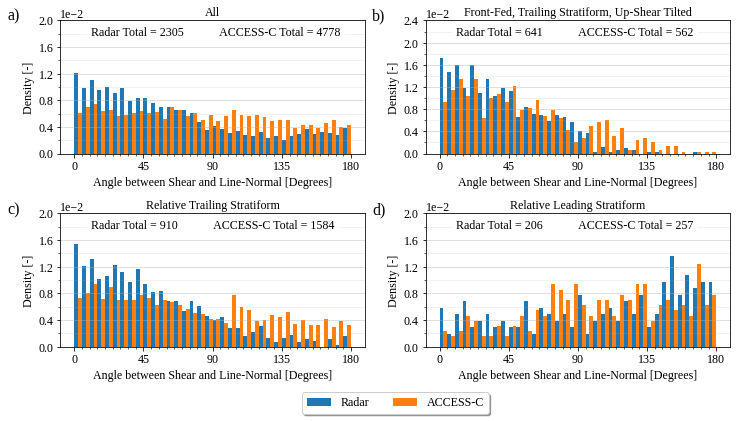

In [115]:
titles = [
    'All', 'Front-Fed, Trailing Stratiform, Up-Shear Tilted', 
    'Relative Trailing Stratiform', 'Relative Leading Stratiform']
td.shear_angle_versus_orientation_hist_compare(radar_dicts, ACCESS_dicts, titles=titles)

[1.0, 1.0, 1.0, 1.0]

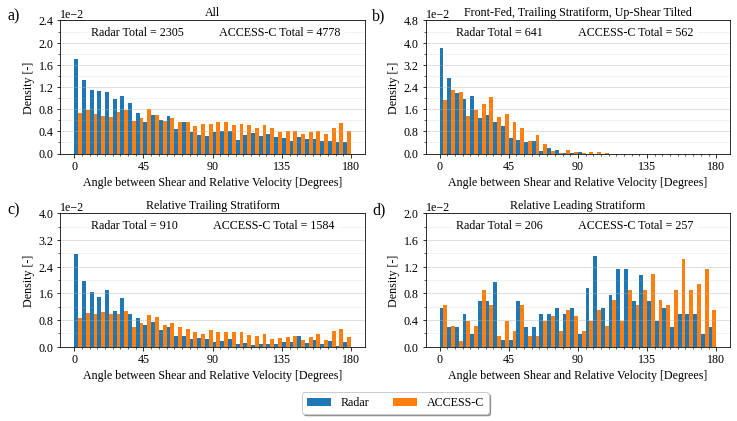

In [116]:
td.shear_angle_versus_propagation_hist_compare(radar_dicts, ACCESS_dicts, titles=titles)

Radar 42, year 2020.
Calculating system tracks.


/home/student.unimelb.edu.au/shorte1/Documents/CPOL_analysis/boring_stats.py:1319: RuntimeWarning: invalid value encountered in remainder
  prop_angle = np.mod(prop_angle, 360)


Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 42, year 2021.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks

/home/student.unimelb.edu.au/shorte1/Documents/CPOL_analysis/boring_stats.py:1451: RuntimeWarning: invalid value encountered in remainder
  prop_angle = np.mod(prop_angle, 360)


Radar 42, year 2021.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Radar 77, year 2021.
Calculating system tracks.
Radar 42, year 2020.
Calculating system tracks.
Radar 42, year 2021.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Radar 77, year 2021.
Calculating system tracks.
Radar 42, year 2020.
Calculating system tracks.
Radar 42, year 2021.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Radar 77, year 2021.
Calculating system tracks.
Radar 42, year 2020.
Calculating system tracks.


/home/student.unimelb.edu.au/shorte1/Documents/CPOL_analysis/boring_stats.py:1319: RuntimeWarning: invalid value encountered in remainder
  prop_angle = np.mod(prop_angle, 360)


Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 42, year 2021.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks

/home/student.unimelb.edu.au/shorte1/Documents/CPOL_analysis/boring_stats.py:1451: RuntimeWarning: invalid value encountered in remainder
  prop_angle = np.mod(prop_angle, 360)


Radar 42, year 2021.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Radar 77, year 2021.
Calculating system tracks.
Radar 42, year 2020.
Calculating system tracks.
Radar 42, year 2021.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Radar 77, year 2021.
Calculating system tracks.
Radar 42, year 2020.
Calculating system tracks.
Radar 42, year 2021.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Radar 77, year 2021.
Calculating system tracks.
Radar 42, year 2020.
Calculating system tracks.


/home/student.unimelb.edu.au/shorte1/Documents/CPOL_analysis/boring_stats.py:1319: RuntimeWarning: invalid value encountered in remainder
  prop_angle = np.mod(prop_angle, 360)


Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 42, year 2021.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks

/home/student.unimelb.edu.au/shorte1/Documents/CPOL_analysis/boring_stats.py:1451: RuntimeWarning: invalid value encountered in remainder
  prop_angle = np.mod(prop_angle, 360)


Radar 42, year 2021.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Radar 77, year 2021.
Calculating system tracks.
Radar 42, year 2020.
Calculating system tracks.
Radar 42, year 2021.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Radar 77, year 2021.
Calculating system tracks.
Radar 42, year 2020.
Calculating system tracks.
Radar 42, year 2021.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Radar 77, year 2021.
Calculating system tracks.
Radar 42, year 2020.
Calculating system tracks.


/home/student.unimelb.edu.au/shorte1/Documents/CPOL_analysis/boring_stats.py:1319: RuntimeWarning: invalid value encountered in remainder
  prop_angle = np.mod(prop_angle, 360)


Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 42, year 2021.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks

/home/student.unimelb.edu.au/shorte1/Documents/CPOL_analysis/boring_stats.py:1451: RuntimeWarning: invalid value encountered in remainder
  prop_angle = np.mod(prop_angle, 360)


Radar 42, year 2021.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Radar 77, year 2021.
Calculating system tracks.
Radar 42, year 2020.
Calculating system tracks.
Radar 42, year 2021.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Radar 77, year 2021.
Calculating system tracks.
Radar 42, year 2020.
Calculating system tracks.
Radar 42, year 2021.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Radar 77, year 2021.
Calculating system tracks.


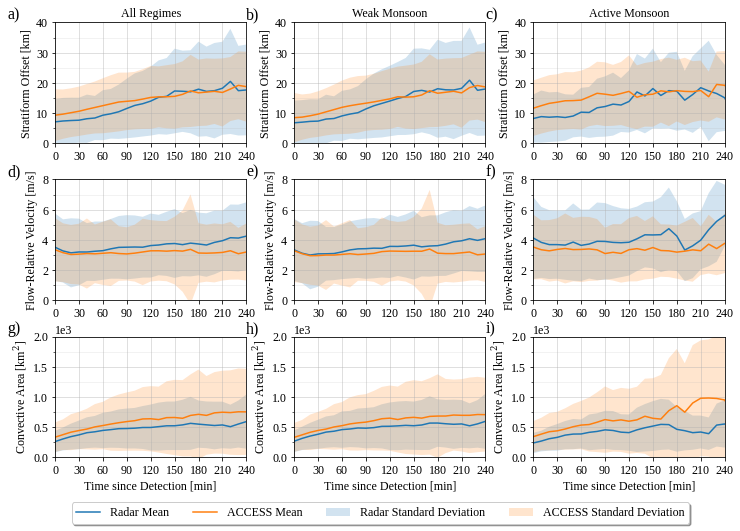

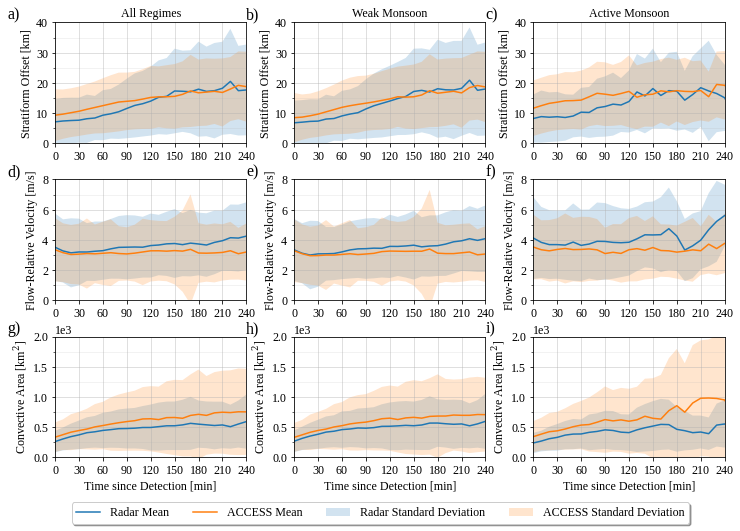

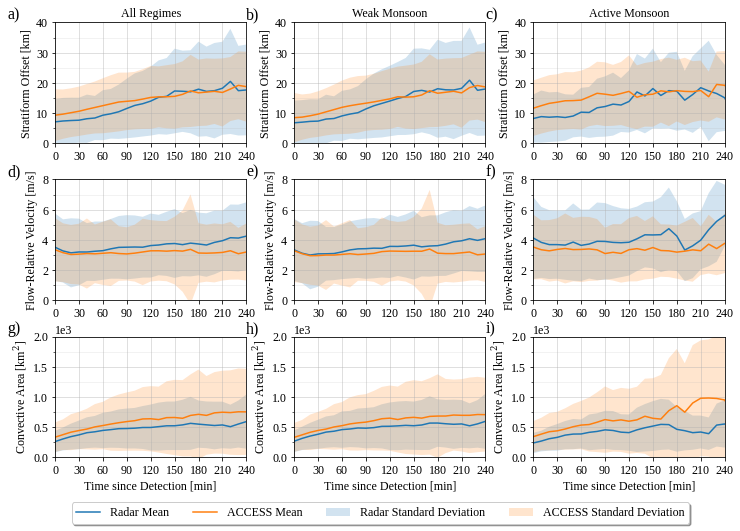

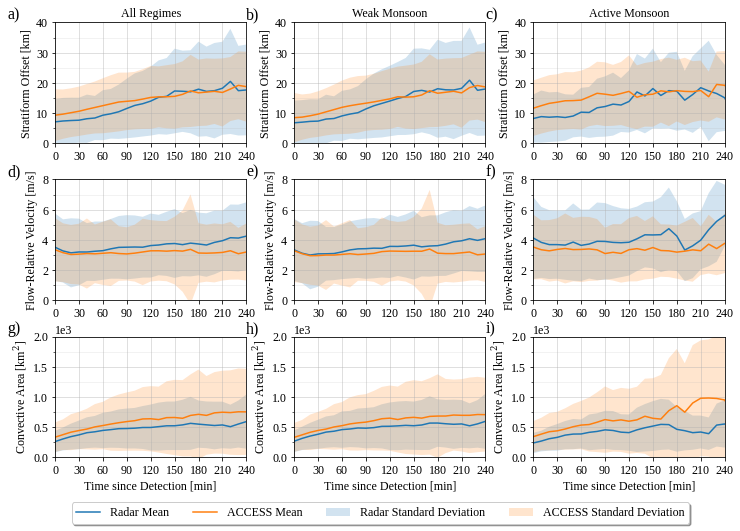

In [74]:
dsets = ['base', 'ambient_swapped', 'lower_wind_level', 'higher_wind_level']
for dset in dsets:
    save_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_tracks/ACCESS_radar_{}/'.format(dset)

    time_series_radar = bs.get_radar_prop_so_stats(
        save_dir, regime=None, radars=radars)

    time_series_weak_radar = bs.get_radar_prop_so_stats(
        save_dir, regime=1, radars=radars)

    time_series_active_radar = bs.get_radar_prop_so_stats(
        save_dir, regime=2, radars=radars)

    time_series_ACCESS = bs.get_ACCESS_prop_so_stats(
        save_dir, regime=None, radars=radars)

    time_series_weak_ACCESS = bs.get_ACCESS_prop_so_stats(
        save_dir, regime=1, radars=radars)

    time_series_active_ACCESS = bs.get_ACCESS_prop_so_stats(
        save_dir, regime=2, radars=radars)

    fig, axes = plt.subplots(3, 3, figsize=(12, 8))

    cl.init_fonts()

    x = np.arange(0, 24*60+10, 10)

    radar_d_list = [
        time_series_radar, time_series_weak_radar, time_series_active_radar]
    ACCESS_d_list = [
        time_series_ACCESS, time_series_weak_ACCESS, time_series_active_ACCESS]

    y_lims = [(0, 40), (0, 8), (0, 2000)]
    dy = [10, 2, 500]
    # y_labels = [
    #     r'$|\mathrm{\mathbf{s}}|$ [km]', 
    #     r'$|\mathrm{\mathbf{v}}_r|$ [m/s]',
    #     r'Convective Area [km$^2$]']
    y_labels = [
        r'Stratiform Offset [km]', 
        r'Flow-Relative Velocity [m/s]',
        r'Convective Area [km$^2$]']

    for k in range(axes.shape[0]):
        for j in range(axes.shape[1]):

            index = j

            radar_d = radar_d_list[k]
            ACCESS_d = ACCESS_d_list[k]

            [
                means_radar, sig_radar, means_ACCESS, sig_ACCESS] = [
                np.zeros(len(radar_d[index])) for i in range(4)]

            lens_radar = np.array(
                [len(radar_d[index][i]) for i in range(len(radar_d[index]))])
            lens_ACCESS = np.array(
                [len(ACCESS_d[index][i]) for i in range(len(ACCESS_d[index]))])

            for i in range(len(radar_d[index])):
                if lens_radar[i]>0:
                    means_radar[i] = np.nanmean(radar_d[index][i])
                    sig_radar[i] = np.sqrt(np.nanvar(radar_d[index][i]))
                if lens_ACCESS[i]>0:
                    means_ACCESS[i] = np.array(np.nanmean(ACCESS_d[index][i]))
                    sig_ACCESS[i] = np.sqrt(np.nanvar(ACCESS_d[index][i]))

            if j == 0:
                means_radar = means_radar/1000
                sig_radar = sig_radar/1000
                means_ACCESS = means_ACCESS/1000
                sig_ACCESS = sig_ACCESS/1000

            axes[j,k].plot(x, means_radar, '', label='Radar Mean')
            axes[j,k].fill_between(
                x, means_radar+sig_radar, means_radar-sig_radar, alpha=0.2,
                label='Radar Standard Deviation')

            axes[j,k].plot(x, means_ACCESS, label='ACCESS Mean')
            axes[j,k].fill_between(
                x, means_ACCESS+sig_ACCESS, means_ACCESS-sig_ACCESS, alpha=0.2,
                label='ACCESS Standard Deviation')

            y_lim = y_lims[j]

            axes[j,k].set_xlim([0, 240])
            axes[j,k].set_xticks(np.arange(0, 270, 30))
            axes[j,k].set_yticks(
                np.arange(y_lim[0], y_lim[1]+dy[j], dy[j]))
            axes[j,k].set_yticks(
                np.arange(y_lim[0], y_lim[1]+int(dy[j]/2), int(dy[j]/2)),
                minor=True)

            axes[j,k].set_ylim(y_lim)
            axes[j,k].set_ylabel(y_labels[j])
            axes[j,k].grid(which='major', alpha=0.5, axis='both')
            axes[j,k].grid(which='minor', alpha=0.2, axis='y')


            if j == 2:
                axes[j,k].ticklabel_format(
                    axis='y', style='sci', scilimits=(0, 0))

    for j in range(3):
        axes[2,j].set_xlabel('Time since Detection [min]')

    titles = ['All Regimes', 'Weak Monsoon', 'Active Monsoon']

    for j in range(3):
        axes[0,j].set_title(titles[j], fontsize=12)

    cl.make_subplot_labels(axes.flatten(), x_shift=-.25, y_shift=.03)
    plt.subplots_adjust(wspace=.25, hspace=.3)

    lines, labels = axes[-1, 0].get_legend_handles_labels()

    lines = [lines[i] for i in[0, 2, 1, 3]]
    labels = [labels[i] for i in [0, 2, 1, 3]]

    axes[-1,0].legend(
        loc='lower center', bbox_to_anchor=(1.7, -0.6),
        ncol=4, fancybox=True, shadow=True)

    plt.savefig(
        'time_series_{}.png'.format(dset),
        dpi=200, facecolor='w',
        edgecolor='white', bbox_inches='tight')

In [ ]:
dset = 'base'

save_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_tracks/ACCESS_radar_{}/'.format(dset)

time_series_radar = bs.get_radar_prop_so_stats(
    save_dir, regime=None, radars=radars)

time_series_weak_radar = bs.get_radar_prop_so_stats(
    save_dir, regime=1, radars=radars)

time_series_active_radar = bs.get_radar_prop_so_stats(
    save_dir, regime=2, radars=radars)

time_series_ACCESS = bs.get_ACCESS_prop_so_stats(
    save_dir, regime=None, radars=radars)

time_series_weak_ACCESS = bs.get_ACCESS_prop_so_stats(
    save_dir, regime=1, radars=radars)

time_series_active_ACCESS = bs.get_ACCESS_prop_so_stats(
    save_dir, regime=2, radars=radars)

Radar 42, year 2020.
Calculating system tracks.


/home/student.unimelb.edu.au/shorte1/Documents/CPOL_analysis/boring_stats.py:1319: RuntimeWarning: invalid value encountered in remainder
  prop_angle = np.mod(prop_angle, 360)


Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 42, year 2021.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks.
Calculating system tracks

/home/student.unimelb.edu.au/shorte1/Documents/CPOL_analysis/boring_stats.py:1451: RuntimeWarning: invalid value encountered in remainder
  prop_angle = np.mod(prop_angle, 360)


Radar 42, year 2021.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Radar 77, year 2021.
Calculating system tracks.
Radar 42, year 2020.
Calculating system tracks.
Radar 42, year 2021.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Radar 77, year 2021.
Calculating system tracks.
Radar 42, year 2020.
Calculating system tracks.
Radar 42, year 2021.
Calculating system tracks.
Radar 63, year 2020.
Calculating system tracks.
Radar 63, year 2021.
Calculating system tracks.
Radar 77, year 2020.
Calculating system tracks.
Radar 77, year 2021.
Calculating system tracks.


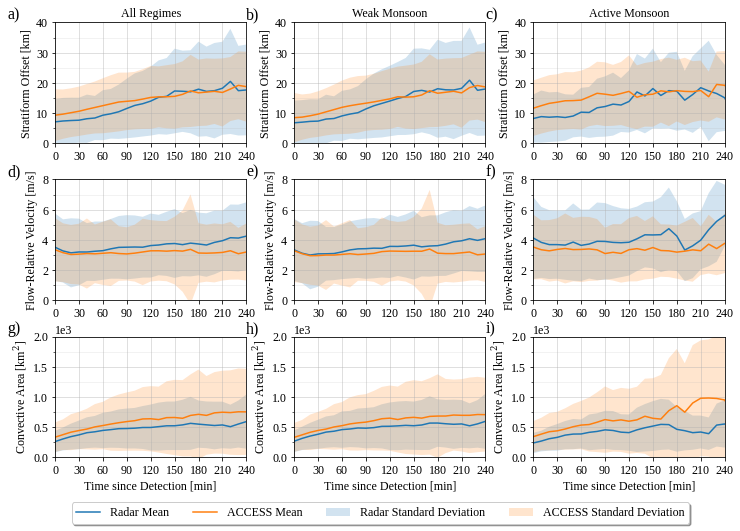

In [75]:
fig, axes = plt.subplots(4, 3, figsize=(12, 10))

cl.init_fonts()

x = np.arange(0, 24*60+10, 10)

radar_d_list = [
    time_series_radar, time_series_weak_radar, time_series_active_radar]
ACCESS_d_list = [
    time_series_ACCESS, time_series_weak_ACCESS, time_series_active_ACCESS]

y_lims = [(0, 40), (0, 8), (0, 2000)]
dy = [10, 2, 500]
# y_labels = [
#     r'$|\mathrm{\mathbf{s}}|$ [km]', 
#     r'$|\mathrm{\mathbf{v}}_r|$ [m/s]',
#     r'Convective Area [km$^2$]']
y_labels = [
    r'Stratiform Offset [km]', 
    r'Flow-Relative Velocity [m/s]',
    r'Convective Area [km$^2$]']

for j in range(axes.shape[0]):
    for k in range(axes.shape[1]):

        index = j

        radar_d = radar_d_list[k]
        ACCESS_d = ACCESS_d_list[k]

        [
            means_radar, sig_radar, means_ACCESS, sig_ACCESS] = [
            np.zeros(len(radar_d[index])) for i in range(4)]

        lens_radar = np.array(
            [len(radar_d[index][i]) for i in range(len(radar_d[index]))])
        lens_ACCESS = np.array(
            [len(ACCESS_d[index][i]) for i in range(len(ACCESS_d[index]))])

        for i in range(len(radar_d[index])):
            if lens_radar[i]>0:
                means_radar[i] = np.nanmean(radar_d[index][i])
                sig_radar[i] = np.sqrt(np.nanvar(radar_d[index][i]))
            if lens_ACCESS[i]>0:
                means_ACCESS[i] = np.array(np.nanmean(ACCESS_d[index][i]))
                sig_ACCESS[i] = np.sqrt(np.nanvar(ACCESS_d[index][i]))

        if j == 0:
            means_radar = means_radar/1000
            sig_radar = sig_radar/1000
            means_ACCESS = means_ACCESS/1000
            sig_ACCESS = sig_ACCESS/1000

        axes[j,k].plot(x, means_radar, '', label='Radar Mean')
        axes[j,k].fill_between(
            x, means_radar+sig_radar, means_radar-sig_radar, alpha=0.2,
            label='Radar Standard Deviation')

        axes[j,k].plot(x, means_ACCESS, label='ACCESS Mean')
        axes[j,k].fill_between(
            x, means_ACCESS+sig_ACCESS, means_ACCESS-sig_ACCESS, alpha=0.2,
            label='ACCESS Standard Deviation')

        y_lim = y_lims[j]

        axes[j,k].set_xlim([0, 240])
        axes[j,k].set_xticks(np.arange(0, 270, 30))
        axes[j,k].set_yticks(
            np.arange(y_lim[0], y_lim[1]+dy[j], dy[j]))
        axes[j,k].set_yticks(
            np.arange(y_lim[0], y_lim[1]+int(dy[j]/2), int(dy[j]/2)),
            minor=True)

        axes[j,k].set_ylim(y_lim)
        axes[j,k].set_ylabel(y_labels[j])
        axes[j,k].grid(which='major', alpha=0.5, axis='both')
        axes[j,k].grid(which='minor', alpha=0.2, axis='y')


        if j == 2:
            axes[j,k].ticklabel_format(
                axis='y', style='sci', scilimits=(0, 0))

for j in range(3):
    axes[2,j].set_xlabel('Time since Detection [min]')

titles = ['All Regimes', 'Weak Monsoon', 'Active Monsoon']

for j in range(3):
    axes[0,j].set_title(titles[j], fontsize=12)

cl.make_subplot_labels(axes.flatten(), x_shift=-.25, y_shift=.03)
plt.subplots_adjust(wspace=.25, hspace=.3)

lines, labels = axes[-1, 0].get_legend_handles_labels()

lines = [lines[i] for i in[0, 2, 1, 3]]
labels = [labels[i] for i in [0, 2, 1, 3]]

axes[-1,0].legend(
    loc='lower center', bbox_to_anchor=(1.7, -0.6),
    ncol=4, fancybox=True, shadow=True)

plt.savefig(
    'time_series_{}.png'.format(dset),
    dpi=200, facecolor='w',
    edgecolor='white', bbox_inches='tight')